# Testing Data Processing Tools

In [1]:
import numpy as np
import pandas as pd
from copy import deepcopy
import matplotlib.pyplot as plt

### Load the datasets and perform some cleanup

* add labels to columns
* verify data types are consistent for each feature

In [2]:
def load_abalone(path):
    df = pd.read_csv(path)
    df = df.set_axis(
        [
            "sex",
            "length",
            "diameter",
            "height",
            "whole weight",
            "shucked weight",
            "viscera weight",
            "shell weight",
            "rings",
        ],
        axis=1,
    )
    return df

In [3]:
data = load_abalone("datasets/abalone.data")
print(f"#rows={len(data)} #columns={len(data.columns)}")
print(data.dtypes)
data.head()

#rows=4176 #columns=9
sex                object
length            float64
diameter          float64
height            float64
whole weight      float64
shucked weight    float64
viscera weight    float64
shell weight      float64
rings               int64
dtype: object


,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [4]:
def load_breast_cancer(path):
    df = pd.read_csv(path)
    df = df.set_axis(
        [
            "sample code number",
            "clump thickness",
            "uniformity of cell size",
            "uniformity of cell shape",
            "marginal adhesion",
            "single epithelial cell size",
            "bare nuclei",
            "bland chromatin",
            "normal nucleoli",
            "mitoses",
            "class",
        ],
        axis=1,
    )
    df = df.drop(columns=["sample code number"])
    df = df.replace("?", np.nan)
    df["bare nuclei"] = df["bare nuclei"].astype(float)
    return df

In [5]:
data_cancer = load_breast_cancer("datasets/breast-cancer-wisconsin.data")
print(f"#rows={len(data_cancer)} #columns={len(data_cancer.columns)}")
print(data_cancer.dtypes)
data_cancer.head()

#rows=698 #columns=10
clump thickness                  int64
uniformity of cell size          int64
uniformity of cell shape         int64
marginal adhesion                int64
single epithelial cell size      int64
bare nuclei                    float64
bland chromatin                  int64
normal nucleoli                  int64
mitoses                          int64
class                            int64
dtype: object


,clump thickness,uniformity of cell size,uniformity of cell shape,marginal adhesion,single epithelial cell size,bare nuclei,bland chromatin,normal nucleoli,mitoses,class
0,5,4,4,5,7,10.0,3,2,1,2
1,3,1,1,1,2,2.0,3,1,1,2
2,6,8,8,1,3,4.0,3,7,1,2
3,4,1,1,3,2,1.0,3,1,1,2
4,8,10,10,8,7,10.0,9,7,1,4


In [6]:
def load_car(path):
    df = pd.read_csv(path)
    df = df.set_axis(
        ["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"], axis=1
    )
    return df

In [7]:
data_car = load_car("datasets/car.data")
print(f"#rows={len(data_car)} #columns={len(data_car.columns)}")
print(data_car.dtypes)
data_car.head()

#rows=1727 #columns=7
buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
class       object
dtype: object


,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [8]:
def load_forest_fires(path):
    df = pd.read_csv(path)
    df = df.set_axis(
        [
            "X",
            "Y",
            "month",
            "day",
            "FFMC",
            "DMC",
            "DC",
            "ISI",
            "temp",
            "RH",
            "wind",
            "rain",
            "area",
        ],
        axis=1,
    )
    return df

In [9]:
data_forest = load_forest_fires("datasets/forestfires.data")
print(f"#rows={len(data_forest)} #columns={len(data_forest.columns)}")
print(data_forest.dtypes)
data_forest.head()

#rows=517 #columns=13
X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


array([[<Axes: title={'center': 'X'}>, <Axes: title={'center': 'Y'}>,
        <Axes: title={'center': 'FFMC'}>],
       [<Axes: title={'center': 'DMC'}>, <Axes: title={'center': 'DC'}>,
        <Axes: title={'center': 'ISI'}>],
       [<Axes: title={'center': 'temp'}>, <Axes: title={'center': 'RH'}>,
        <Axes: title={'center': 'wind'}>],
       [<Axes: title={'center': 'rain'}>,
        <Axes: title={'center': 'area'}>, <Axes: >]], dtype=object)

<Figure size 640x480 with 0 Axes>

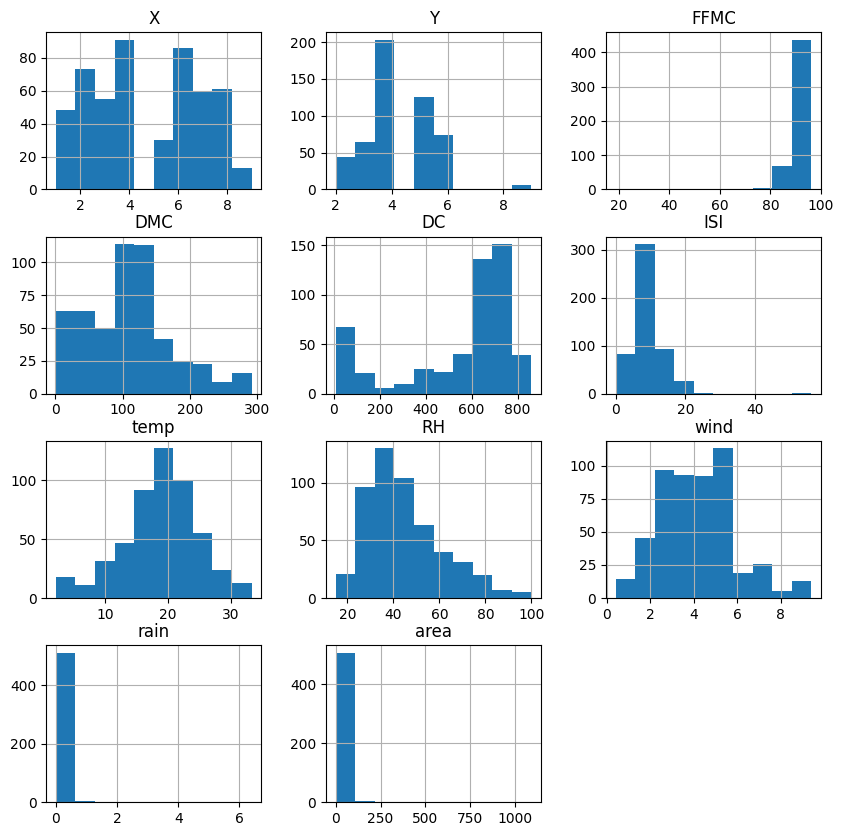

In [10]:
plt.figure()
data_forest.hist(figsize=(10, 10))

In [11]:
def load_house_votes(path):
    df = pd.read_csv(path)
    df = df.set_axis(
        [
            "class",
            "handicapped infants",
            "water project cost sharing",
            "adoption of the budget resolution",
            "physician fee freeze",
            "el salvador aid",
            "religious groups in schools",
            "anti satellite test ban",
            "aid to nicaraguan contras",
            "mx missile",
            "immigration",
            "synfuels corporation cutback",
            "education spending",
            "superfund right to sue",
            "crime",
            "duty free exports",
            "export administration act south africa",
        ],
        axis=1,
    )
    return df

In [12]:
data_house = load_house_votes("datasets/house-votes-84.data")
print(f"#rows={len(data_house)} #columns={len(data_house.columns)}")
print(data_house.dtypes)
data_house.head()

#rows=434 #columns=17
class                                     object
handicapped infants                       object
water project cost sharing                object
adoption of the budget resolution         object
physician fee freeze                      object
el salvador aid                           object
religious groups in schools               object
anti satellite test ban                   object
aid to nicaraguan contras                 object
mx missile                                object
immigration                               object
synfuels corporation cutback              object
education spending                        object
superfund right to sue                    object
crime                                     object
duty free exports                         object
export administration act south africa    object
dtype: object


,class,handicapped infants,water project cost sharing,adoption of the budget resolution,physician fee freeze,el salvador aid,religious groups in schools,anti satellite test ban,aid to nicaraguan contras,mx missile,immigration,synfuels corporation cutback,education spending,superfund right to sue,crime,duty free exports,export administration act south africa
0,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
1,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
2,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
3,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
4,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y


In [13]:
def load_machine(path):
    df = pd.read_csv(path)
    df = df.set_axis(
        [
            "vendor",
            "model",
            "MYCT",
            "MMIN",
            "MMAX",
            "CACH",
            "CHMIN",
            "CHMAX",
            "PRP",
            "ERP",
        ],
        axis=1,
    )
    df = df.drop(["vendor", "model"], axis=1)
    return df

In [14]:
data_machine = load_machine("datasets/machine.data")
print(f"#rows={len(data_machine)} #columns={len(data_machine.columns)}")
print(data_machine.dtypes)
data_machine.head()

#rows=208 #columns=8
MYCT     int64
MMIN     int64
MMAX     int64
CACH     int64
CHMIN    int64
CHMAX    int64
PRP      int64
ERP      int64
dtype: object


,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,29,8000,32000,32,8,32,269,253
1,29,8000,32000,32,8,32,220,253
2,29,8000,32000,32,8,32,172,253
3,29,8000,16000,32,8,16,132,132
4,26,8000,32000,64,8,32,318,290


### Impute missing values

In [15]:
def impute_mean(data, columns, data_type=float):
    for column in columns:
        data[column] = data[column].fillna(data[column].mean()).astype(data_type)
    return data

In [16]:
data_cancer.isnull().any()

clump thickness                False
uniformity of cell size        False
uniformity of cell shape       False
marginal adhesion              False
single epithelial cell size    False
bare nuclei                     True
bland chromatin                False
normal nucleoli                False
mitoses                        False
class                          False
dtype: bool

In [17]:
data_cancer = impute_mean(data_cancer, ["bare nuclei"], int)
data_cancer.head()

,clump thickness,uniformity of cell size,uniformity of cell shape,marginal adhesion,single epithelial cell size,bare nuclei,bland chromatin,normal nucleoli,mitoses,class
0,5,4,4,5,7,10,3,2,1,2
1,3,1,1,1,2,2,3,1,1,2
2,6,8,8,1,3,4,3,7,1,2
3,4,1,1,3,2,1,3,1,1,2
4,8,10,10,8,7,10,9,7,1,4


In [18]:
data_cancer.isnull().any()

clump thickness                False
uniformity of cell size        False
uniformity of cell shape       False
marginal adhesion              False
single epithelial cell size    False
bare nuclei                    False
bland chromatin                False
normal nucleoli                False
mitoses                        False
class                          False
dtype: bool

### Encode ordinal data

(data where order matters)

In [19]:
def encode_ordinal(data, column, relationship):
    print(f"encoding column: {column}")
    for index, rank in enumerate(relationship):
        data[column] = data[column].replace(rank, index)
        print(f"value: {rank} as: {index}")
    return

In [20]:
ord_test = deepcopy(data_car)
encode_ordinal(ord_test, "buying", ["low", "med", "high", "vhigh"])

encoding column: buying
value: low as: 0
value: med as: 1
value: high as: 2
value: vhigh as: 3


In [21]:
ord_test

,buying,maint,doors,persons,lug_boot,safety,class
0,3,vhigh,2,2,small,med,unacc
1,3,vhigh,2,2,small,high,unacc
2,3,vhigh,2,2,med,low,unacc
3,3,vhigh,2,2,med,med,unacc
4,3,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,0,low,5more,more,med,med,good
1723,0,low,5more,more,med,high,vgood
1724,0,low,5more,more,big,low,unacc
1725,0,low,5more,more,big,med,good


In [22]:
data_car

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


### Encode Nominal data

(data with no natural ordering)

In [23]:
def one_hot_encode(data, columns):
    for col in columns:
        hot = pd.get_dummies(data[col], prefix=col, drop_first=True, dtype=int)
        data = pd.concat([data, hot], axis=1)
        data = data.drop(columns=[col])
    return data

In [24]:
one_hot_encode(
    data_house,
    [
        "class",
        "handicapped infants",
        "water project cost sharing",
        "adoption of the budget resolution",
        "physician fee freeze",
        "el salvador aid",
        "religious groups in schools",
        "anti satellite test ban",
        "aid to nicaraguan contras",
        "mx missile",
        "immigration",
        "synfuels corporation cutback",
        "education spending",
        "superfund right to sue",
        "crime",
        "duty free exports",
        "export administration act south africa",
    ],
)

,class_republican,handicapped infants_n,handicapped infants_y,water project cost sharing_n,water project cost sharing_y,adoption of the budget resolution_n,adoption of the budget resolution_y,physician fee freeze_n,physician fee freeze_y,el salvador aid_n,...,education spending_n,education spending_y,superfund right to sue_n,superfund right to sue_y,crime_n,crime_y,duty free exports_n,duty free exports_y,export administration act south africa_n,export administration act south africa_y
0,1,1,0,0,1,1,0,0,1,0,...,0,1,0,1,0,1,1,0,0,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,1,0,1,1,0,1,0
2,0,1,0,0,1,0,1,1,0,0,...,1,0,0,1,1,0,1,0,0,1
3,0,0,1,0,1,0,1,1,0,0,...,0,0,0,1,0,1,0,1,0,1
4,0,1,0,0,1,0,1,1,0,0,...,1,0,0,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429,1,1,0,1,0,0,1,0,1,0,...,0,1,0,1,0,1,1,0,0,1
430,0,1,0,1,0,0,1,1,0,1,...,1,0,1,0,1,0,1,0,0,1
431,1,1,0,0,0,1,0,0,1,0,...,0,1,0,1,0,1,1,0,0,1
432,1,1,0,1,0,1,0,0,1,0,...,0,1,0,1,0,1,1,0,0,1


In [25]:
data_house.head()

,class,handicapped infants,water project cost sharing,adoption of the budget resolution,physician fee freeze,el salvador aid,religious groups in schools,anti satellite test ban,aid to nicaraguan contras,mx missile,immigration,synfuels corporation cutback,education spending,superfund right to sue,crime,duty free exports,export administration act south africa
0,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
1,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
2,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
3,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
4,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y


### Discretize features

(group data within a certain range and replace it with a single value)
* width approach creates equally spaced bins
* frequency approach creates bins with approximately the same number of datapoints

In [26]:
def discretize_feature(data, columns, number_bins, type_bins):
    for col in columns:
        if type_bins == "frequency":
            binned = pd.qcut(data[col], q=number_bins, precision=0, duplicates="drop")
            data[col] = binned

        if type_bins == "width":
            binned = pd.cut(data[col], number_bins)
            data[col] = binned

    return

In [27]:
test_discrete = deepcopy(data_forest)
discretize_feature(test_discrete, ["DMC"], 10, "width")
print(f'{test_discrete["DMC"].value_counts()} \n')
test_discrete.head()

DMC
(88.16, 117.18]     114
(117.18, 146.2]     113
(0.81, 30.12]        63
(30.12, 59.14]       63
(59.14, 88.16]       49
(146.2, 175.22]      42
(175.22, 204.24]     25
(204.24, 233.26]     23
(262.28, 291.3]      16
(233.26, 262.28]      9
Name: count, dtype: int64 



,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,"(0.81, 30.12]",94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,"(30.12, 59.14]",669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,"(30.12, 59.14]",686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,"(30.12, 59.14]",77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,"(30.12, 59.14]",102.2,9.6,11.4,99,1.8,0.0,0.0


In [28]:
discretize_feature(test_discrete, ["RH"], 4, "frequency")
print(f'{test_discrete["RH"].value_counts()} \n')
test_discrete.head()

RH
(14.0, 33.0]     144
(33.0, 42.0]     131
(53.0, 100.0]    128
(42.0, 53.0]     114
Name: count, dtype: int64 



,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,"(0.81, 30.12]",94.3,5.1,8.2,"(42.0, 53.0]",6.7,0.0,0.0
1,7,4,oct,tue,90.6,"(30.12, 59.14]",669.1,6.7,18.0,"(14.0, 33.0]",0.9,0.0,0.0
2,7,4,oct,sat,90.6,"(30.12, 59.14]",686.9,6.7,14.6,"(14.0, 33.0]",1.3,0.0,0.0
3,8,6,mar,fri,91.7,"(30.12, 59.14]",77.5,9.0,8.3,"(53.0, 100.0]",4.0,0.2,0.0
4,8,6,mar,sun,89.3,"(30.12, 59.14]",102.2,9.6,11.4,"(53.0, 100.0]",1.8,0.0,0.0


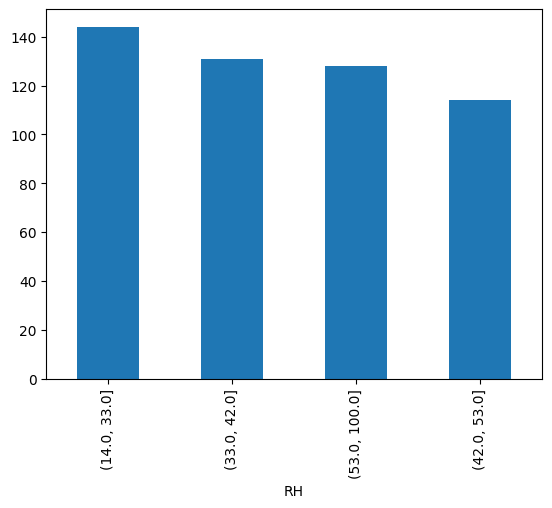

In [29]:
# Display
cols = test_discrete["RH"].value_counts().plot.bar()
plt.show()

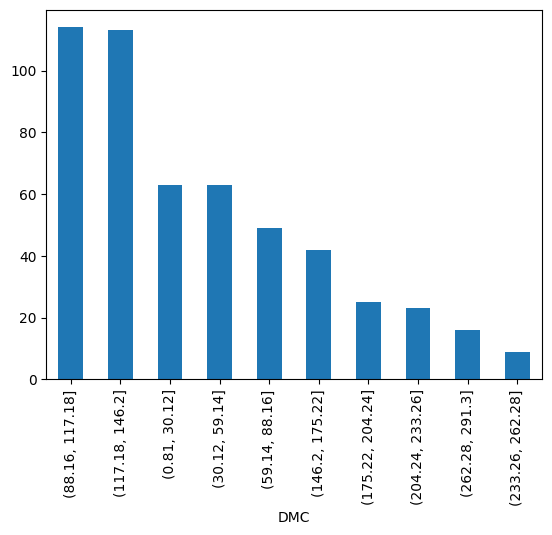

In [30]:
# Display
cols = test_discrete["DMC"].value_counts().plot.bar()
plt.show()

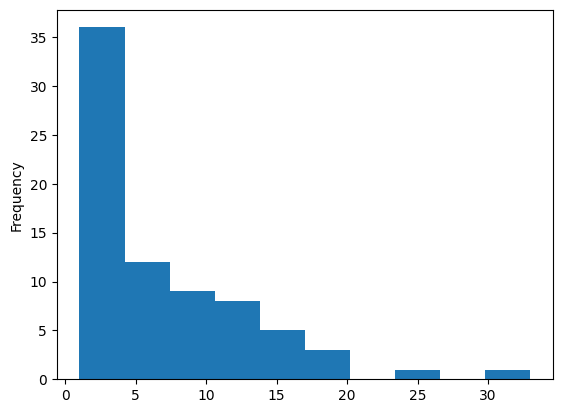

In [31]:
# Display
cols = data_forest["RH"].value_counts().plot.hist()
plt.show()

### Standardize feature values

(normalizes the data to make sure feature values are on the same scale)

In [32]:
def standardize(training_data, test_data, columns):
    data_train = deepcopy(training_data)
    data_test = deepcopy(test_data)
    for cols in columns:
        mean = data_train[cols].mean()
        std = data_train[cols].std()

        z_train = (data_train[cols] - mean) / std
        z_test = (data_test[cols] - mean) / std
        data_train[cols] = z_train
        data_test[cols] = z_test
    return data_train, data_test

In [33]:
forest_train, forest_test = standardize(
    data_forest.loc[:399], data_forest.loc[400:], ["FFMC", "DMC", "DC"]
)
print(f"{forest_train.head()} \n")
print(f"{forest_test.head()} \n")

   X  Y month  day      FFMC       DMC        DC  ISI  temp  RH  wind  rain  \
0  7  5   mar  fri -0.718949 -1.399864 -1.809913  5.1   8.2  51   6.7   0.0   
1  7  4   oct  tue  0.035763 -1.222592  0.504832  6.7  18.0  33   0.9   0.0   
2  7  4   oct  sat  0.035763 -1.062662  0.576514  6.7  14.6  33   1.3   0.0   
3  8  6   mar  fri  0.224441 -1.263057 -1.877567  9.0   8.3  97   4.0   0.2   
4  8  6   mar  sun -0.187220 -0.916221 -1.778099  9.6  11.4  99   1.8   0.0   

   area  
0   0.0  
1   0.0  
2   0.0  
3   0.0  
4   0.0   

     X  Y month  day      FFMC       DMC        DC   ISI  temp  RH  wind  \
400  9  5   jun  wed  0.498882 -0.950904 -0.990812  14.0  28.0  34   4.5   
401  3  4   sep  thu  0.121526 -0.205207  0.756925   8.3  22.8  46   4.0   
402  9  9   aug  fri  0.756170  2.469285  0.656249  12.0  25.0  36   4.0   
403  8  6   aug  thu  0.052916  1.835346  0.399726   6.8  21.3  41   3.6   
404  2  4   sep  wed -0.427356 -0.270720  0.730347   3.7  21.8  34   2.2   

     r

In [34]:
data_forest.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


### Cross validation

* training data = 80%
* validation data = 20%
* k-fold on training data
    * stratify for classification problems

For hyperparameter tuning

* train using candidate parameters using 4 out of 5 folds
* validate model results using validation set
* once parameters are chosen train 5 models using 4 out of 5 folds and test on 5th fold
* report average results

In [35]:
def extract_validation_set(data, target):
    stratify_20 = data.groupby(target, group_keys=False).sample(frac=0.20)
    stratify_80 = data.drop(stratify_20.index).sample(frac=1)

    return stratify_80, stratify_20

In [36]:
def create_train_test(folds, index):
    test = []
    training = pd.DataFrame()
    for i, fold in enumerate(folds):
        if i == index:
            test = fold
        else:
            training = pd.concat([training, fold])
    return training, test

In [37]:
def k_fold(data, k):
    _data = deepcopy(data)

    d, m = divmod(len(_data), k)
    folds = list(
        _data[i * d + min(i, m) : (i + 1) * d + min(i + 1, m)] for i in range(k)
    )

    return folds

In [38]:
def stratified_k_fold(data, k, name_of_class_column):
    _data = deepcopy(data)
    y = name_of_class_column

    split = []
    unique_keys = _data.value_counts(subset=y, normalize=True).keys()
    split_class = [_data.loc[_data[y] == keys] for keys in unique_keys]

    for class_value in split_class:
        d, m = divmod(len(class_value), k)
        split.append(
            list(
                class_value[i * d + min(i, m) : (i + 1) * d + min(i + 1, m)]
                for i in range(k)
            )
        )

    folds = [
        pd.concat([split[i][c] for i in range(len(unique_keys))]) for c in range(k)
    ]

    return folds

In [39]:
train, valid = extract_validation_set(data_car, "class")
train = stratified_k_fold(train, 5, "class")
print(f'\nValidation Set:\n{valid.value_counts(subset = "class", normalize=True)} \n')
print("folds:\n")
print(f'fold: 1\n{train[1].value_counts(subset="class", normalize=True)}\n')
print(f'fold: 2\n{train[0].value_counts(subset="class", normalize=True)}\n')
print(f'fold: 3\n{train[2].value_counts(subset="class", normalize=True)}\n')
print(f'fold: 4\n{train[3].value_counts(subset="class", normalize=True)}\n')
print(f'fold: 5\n{train[4].value_counts(subset="class", normalize=True)}\n')


Validation Set:
class
unacc    0.699422
acc      0.222543
good     0.040462
vgood    0.037572
Name: proportion, dtype: float64 

folds:

fold: 1
class
unacc    0.697842
acc      0.223022
good     0.039568
vgood    0.039568
Name: proportion, dtype: float64

fold: 2
class
unacc    0.697842
acc      0.223022
good     0.039568
vgood    0.039568
Name: proportion, dtype: float64

fold: 3
class
unacc    0.701818
acc      0.221818
good     0.040000
vgood    0.036364
Name: proportion, dtype: float64

fold: 4
class
unacc    0.701818
acc      0.221818
good     0.040000
vgood    0.036364
Name: proportion, dtype: float64

fold: 5
class
unacc    0.701818
acc      0.221818
good     0.040000
vgood    0.036364
Name: proportion, dtype: float64



In [40]:
create_train_test(train, 0)

(     buying maint  doors persons lug_boot safety  class
 621    high  high  5more       2    small    med  unacc
 171   vhigh  high      4       4    small    med  unacc
 194   vhigh  high  5more       2      big    low  unacc
 357   vhigh   low      3       2      big    med  unacc
 1543    low   med      3       2      med   high  unacc
 ...     ...   ...    ...     ...      ...    ...    ...
 1177    med   med  5more       4      big   high  vgood
 1474    low  high      4       4      big   high  vgood
 1717    low   low  5more       4      big   high  vgood
 1483    low  high      4    more      big   high  vgood
 1456    low  high      3    more      big   high  vgood
 
 [1103 rows x 7 columns],
      buying  maint  doors persons lug_boot safety  class
 1055    med   high  5more       2      med    low  unacc
 1083    med    med      2       2      med    med  unacc
 1242    med    low      4       2    small    med  unacc
 1295    low  vhigh      2       2    small    low  unac

In [41]:
train, test = extract_validation_set(data, "rings")
train = k_fold(train, 5)
test = k_fold(test, 5)
print(f"total folds {len(train)} \nSize of folds")
print(len(train[0]))
print(len(train[1]))
print(len(train[2]))
print(len(train[3]))
print(len(train[4]))
print(f"\nTest Set length: {sum([len(test[i]) for i in range(len(test))])}")
print(f"\nSet length: {len(data)}")

total folds 5 
Size of folds
669
669
669
669
668

Test Set length: 832

Set length: 4176


In [42]:
create_train_test(train, 0)

(     sex  length  diameter  height  whole weight  shucked weight  \
 2493   M   0.400     0.305   0.130        0.2935          0.0960   
 3845   I   0.370     0.275   0.085        0.2045          0.0960   
 3394   F   0.605     0.450   0.165        1.2225          0.3570   
 4023   I   0.330     0.245   0.065        0.1445          0.0580   
 649    M   0.255     0.180   0.065        0.0790          0.0340   
 ...   ..     ...       ...     ...           ...             ...   
 3903   M   0.575     0.470   0.165        0.8530          0.2920   
 1158   M   0.605     0.480   0.170        1.1835          0.5820   
 3865   F   0.525     0.430   0.165        0.7170          0.2890   
 3547   F   0.495     0.370   0.120        0.5940          0.2800   
 3515   F   0.700     0.575   0.200        1.7365          0.7755   
 
       viscera weight  shell weight  rings  
 2493          0.0675        0.1050      9  
 3845          0.0560        0.0800      6  
 3394          0.2020        0.3850

### Evaluation Metrics

In [43]:
def evaluation(ground_truth, predicted_values, metric):
    if metric == "classification_score":
        count = 0
        for index, value in enumerate(ground_truth):
            if predicted_values[index] == value:
                count += 1
        count = count / len(ground_truth)
        return count
    if metric == "mse":
        error = sum((np.array(ground_truth) - np.array(predicted_values)) ** 2) / len(
            ground_truth
        )
        return error

In [44]:
evaluation([10, 15, 20], [11, 16, 21], "mse")

1.0

### Majority Class and Average output

In [45]:
def majority_class(data, name_of_class_column):
    majority = data[name_of_class_column].value_counts()
    return majority.keys()[0]

In [46]:
majority_class(data_car, "class")

'unacc'

In [47]:
def average_output(data, name_of_class_column):
    average = data[name_of_class_column].mean()
    return average

In [48]:
avg = average_output(data, "rings")
avg = [avg] * 5
avg

[9.932471264367816,
 9.932471264367816,
 9.932471264367816,
 9.932471264367816,
 9.932471264367816]

## Null Model

In [49]:
data_abalone = load_abalone("datasets/abalone.data")
data_cancer = load_breast_cancer("datasets/breast-cancer-wisconsin.data")
data_car = load_car("datasets/car.data")
data_forest = load_forest_fires("datasets/forestfires.data")
data_house = load_house_votes("datasets/house-votes-84.data")
data_machine = load_machine("datasets/machine.data")

In [50]:
def null_model(data, type, target):
    average = []
    folds = k_fold(data, 5)

    for index, fold in enumerate(folds):
        train, test = create_train_test(folds, index)

        if type == "regression":
            null = [average_output(train, target)] * len(test)
            ground_truth = test[target]

            result = evaluation(ground_truth, null, "mse")
            average.append(result)

            print(f"null hypothesis: {null[0]}")
            print(f"evaluating fold {index+1}: mse {result} \n")

        if type == "classification":
            null = [majority_class(train, target)] * len(test)
            ground_truth = fold[target]

            result = evaluation(ground_truth, null, "classification_score")
            average.append(result)

            print(f"null hypothesis: {null[0]}")
            print(f"evaluating fold {index+1}: classification score {result} \n")

        else:
            null = [0]
            result = 0
            print("Error: type must be regression or classification")

    average = sum(average) / len(average)
    print(f"The average mean squared error over 5 folds is: {average}")
    return average

In [51]:
null_model(data_abalone, "regression", "rings")

null hypothesis: 9.565868263473053
evaluating fold 1: mse 20.46853225045762 

Error: type must be regression or classification
null hypothesis: 10.267883867105658
evaluating fold 2: mse 6.569484668251534 

Error: type must be regression or classification
null hypothesis: 9.793175695899432
evaluating fold 3: mse 11.937605371514326 

Error: type must be regression or classification
null hypothesis: 9.996108949416342
evaluating fold 4: mse 7.972358391515336 

Error: type must be regression or classification
null hypothesis: 10.039209817419934
evaluating fold 5: mse 7.521761732163968 

Error: type must be regression or classification
The average mean squared error over 5 folds is: 10.893948482780557


10.893948482780557

In [52]:
null_model(data_cancer, "classification", "class")

null hypothesis: 2
evaluating fold 1: classification score 0.5571428571428572 

null hypothesis: 2
evaluating fold 2: classification score 0.5428571428571428 

null hypothesis: 2
evaluating fold 3: classification score 0.65 

null hypothesis: 2
evaluating fold 4: classification score 0.7769784172661871 

null hypothesis: 2
evaluating fold 5: classification score 0.7482014388489209 

The average mean squared error over 5 folds is: 0.6550359712230216


0.6550359712230216

In [53]:
null_model(data_car, "classification", "class")

null hypothesis: unacc
evaluating fold 1: classification score 0.884393063583815 

null hypothesis: unacc
evaluating fold 2: classification score 0.7716763005780347 

null hypothesis: unacc
evaluating fold 3: classification score 0.6695652173913044 

null hypothesis: unacc
evaluating fold 4: classification score 0.6028985507246377 

null hypothesis: unacc
evaluating fold 5: classification score 0.5710144927536231 

The average mean squared error over 5 folds is: 0.699909525006283


0.699909525006283

In [54]:
null_model(data_forest, "regression", "area")

null hypothesis: 16.082445520581114
evaluating fold 1: mse 258.6450539224598 

Error: type must be regression or classification
null hypothesis: 15.202542372881355
evaluating fold 2: mse 156.5285811703091 

Error: type must be regression or classification
null hypothesis: 7.858091787439615
evaluating fold 3: mse 13336.970799757748 

Error: type must be regression or classification
null hypothesis: 13.817826086956524
evaluating fold 4: mse 453.1334642868935 

Error: type must be regression or classification
null hypothesis: 11.289057971014493
evaluating fold 5: mse 6490.391941931462 

Error: type must be regression or classification
The average mean squared error over 5 folds is: 4139.133968213775


4139.133968213775

In [55]:
null_model(data_house, "classification", "class")

null hypothesis: democrat
evaluating fold 1: classification score 0.5977011494252874 

null hypothesis: democrat
evaluating fold 2: classification score 0.6206896551724138 

null hypothesis: democrat
evaluating fold 3: classification score 0.6436781609195402 

null hypothesis: democrat
evaluating fold 4: classification score 0.6091954022988506 

null hypothesis: democrat
evaluating fold 5: classification score 0.6046511627906976 

The average mean squared error over 5 folds is: 0.615183106121358


0.615183106121358